In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [85]:
sales_df = pd.read_csv('sales_data.csv')

In [87]:
sales_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [88]:
sales_df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [89]:
sales_df.shape

(113036, 18)

In [90]:
sales_df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [91]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

### Measures of Dispersion

In [93]:
numeric_columns = sales_df.select_dtypes(include=['number'])
mean_values = numeric_columns.mean()  # Mean of each column
median_values = numeric_columns.median()  # Median of each column
mode_values = numeric_columns.mode()  # Mode of each column
variance_values = numeric_columns.var()  # Variance of each column
std_dev_values = numeric_columns.std()  # Standard deviation of each column
range_values = numeric_columns.max() - sales_df.min()  # Range for each column

# Display the calculated statistics
print("Mean:\n\n", mean_values,"\n")
print("Median:\n\n", median_values,"\n")
print("Mode:\n\n", mode_values.iloc[0],"\n")  # iloc[0] for first mode in case of multiple modes
print("Variance:\n\n", variance_values,"\n")
print("Standard Deviation:\n\n", std_dev_values,"\n")
print("Range:\n", range_values)

Mean:

 Day                 15.665753
Year              2014.401739
Customer_Age        35.919212
Order_Quantity      11.901660
Unit_Cost          267.296366
Unit_Price         452.938427
Profit             285.051665
Cost               469.318695
Revenue            754.370360
dtype: float64 

Median:

 Day                 16.0
Year              2014.0
Customer_Age        35.0
Order_Quantity      10.0
Unit_Cost            9.0
Unit_Price          24.0
Profit             101.0
Cost               108.0
Revenue            223.0
dtype: float64 

Mode:

 Day                 24.0
Year              2014.0
Customer_Age        31.0
Order_Quantity       1.0
Unit_Cost            2.0
Unit_Price           5.0
Profit               3.0
Cost              1252.0
Revenue             35.0
Name: 0, dtype: float64 

Variance:

 Day               7.711592e+01
Year              1.619283e+00
Customer_Age      1.214831e+02
Order_Quantity    9.142910e+01
Unit_Cost         3.023191e+05
Unit_Price        8.502153e

#### Determine if it is a Classification or Regression dataset¶
##### Dataset is a classification dataset because:
##### Target Variable: User Behavior Class is categorical (e.g., classes 0 to 4).
##### Goal: We are to Predict which class a user belongs to, based on features like app usage time, battery drain, etc.
##### Not Regression: The target is not a continuous numeric value but discrete categories.
#### Conclusion:
##### It's a classification problem, where the task is to classify users into behavior classes based on their usage patterns.

### Checking for missing values

In [98]:
# Looping through columns to check for missing values
for column in sales_df.columns:
    missing_count = sales_df[column].isnull().sum()
    if missing_count > 0:
        print(f"{column} has {missing_count} missing values")
    else:
        print('No Missing Values')

No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values
No Missing Values


### Checking for Outliers using z-score

In [102]:
# Calculate Z-scores for numerical columns in your dataset
numeric_columns = sales_df.select_dtypes(include=[np.number]).columns  # Select only numerical columns

# Calculate Z-scores
z_scores = np.abs((sales_df[numeric_columns] - sales_df[numeric_columns].mean()) / sales_df[numeric_columns].std())

# Set a threshold for identifying outliers (typically 3 standard deviations)
threshold = 2.0

# Identify outliers
outliers = (z_scores > threshold)

# Print the results for each numerical column
for column in numeric_columns:
    if outliers[column].any():  # Check if there are any outliers in the column
        print(f"Column '{column}' has {outliers[column].sum()} outlier(s).")
    else:
        print(f"Column '{column}' has no outliers.")

Column 'Day' has no outliers.
Column 'Year' has 2677 outlier(s).
Column 'Customer_Age' has 4170 outlier(s).
Column 'Order_Quantity' has 258 outlier(s).
Column 'Unit_Cost' has 8384 outlier(s).
Column 'Unit_Price' has 11402 outlier(s).
Column 'Profit' has 4571 outlier(s).
Column 'Cost' has 4335 outlier(s).
Column 'Revenue' has 5134 outlier(s).


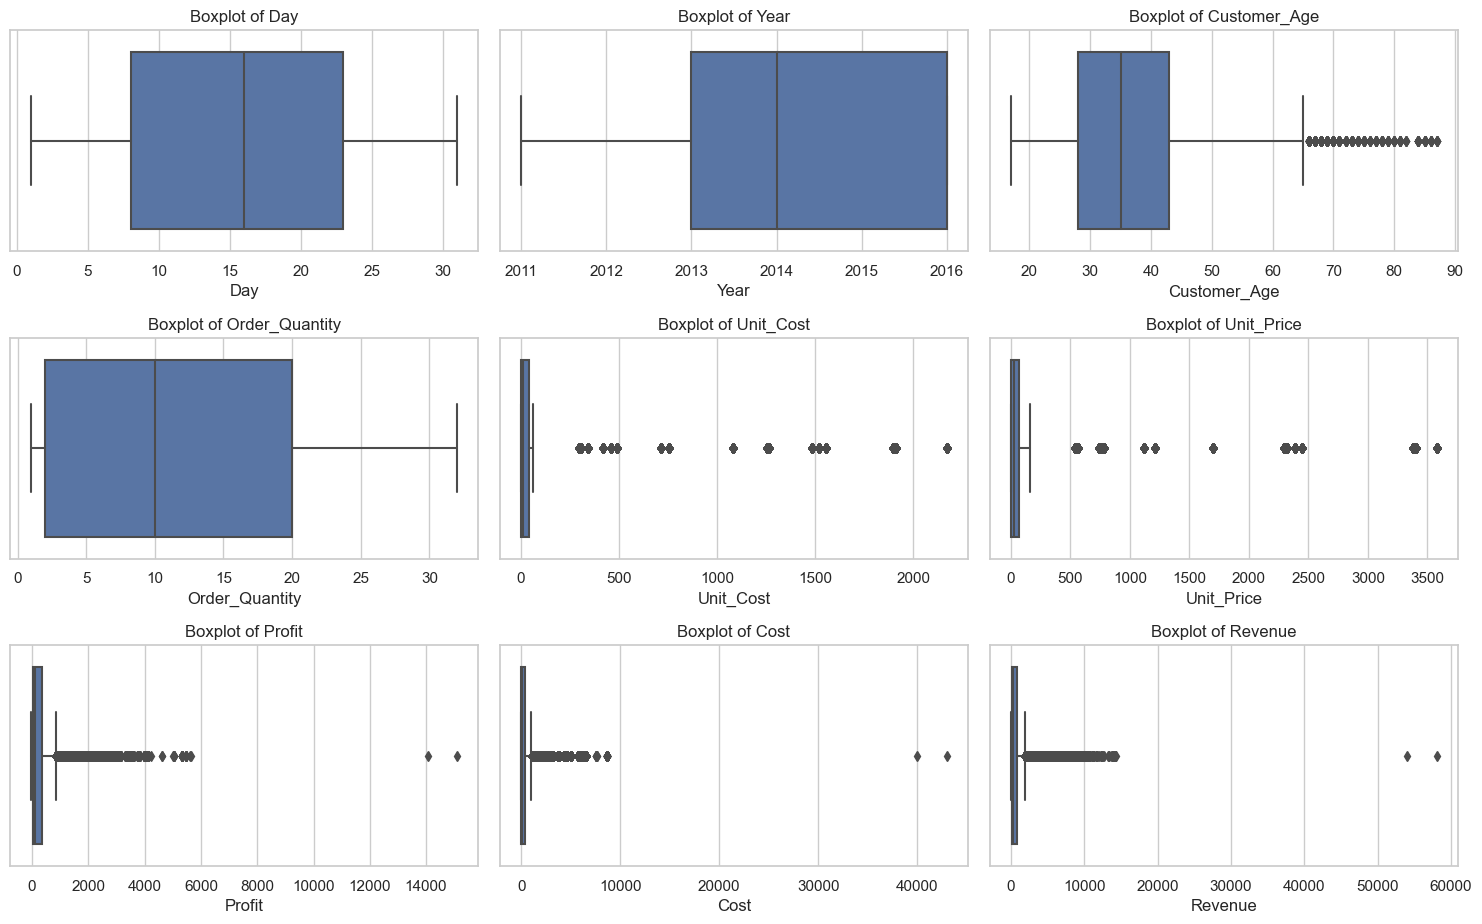

In [104]:
# Select only numerical columns from your dataset
numeric_columns = sales_df.select_dtypes(include=[np.number]).columns

# Adjust the figure size based on the number of columns
plt.figure(figsize=(15, 12))  # Adjust the size as needed based on the number of plots

# Loop through numerical columns and create boxplots
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i + 1)  # Dynamically adjust number of rows and columns
    sns.boxplot(x = sales_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display all plots

### Skewness checker

In [107]:
# Calculate skewness for each numeric column in your 'sales_df' dataset
skewness = sales_df[numeric_columns].skew()

# Display skewness values
print("Skewness of numeric columns:")
print(skewness)

Skewness of numeric columns:
Day               0.013722
Year             -0.371120
Customer_Age      0.525300
Order_Quantity    0.378179
Unit_Cost         2.111548
Unit_Price        2.088041
Profit            4.002662
Cost              5.083239
Revenue           4.670908
dtype: float64


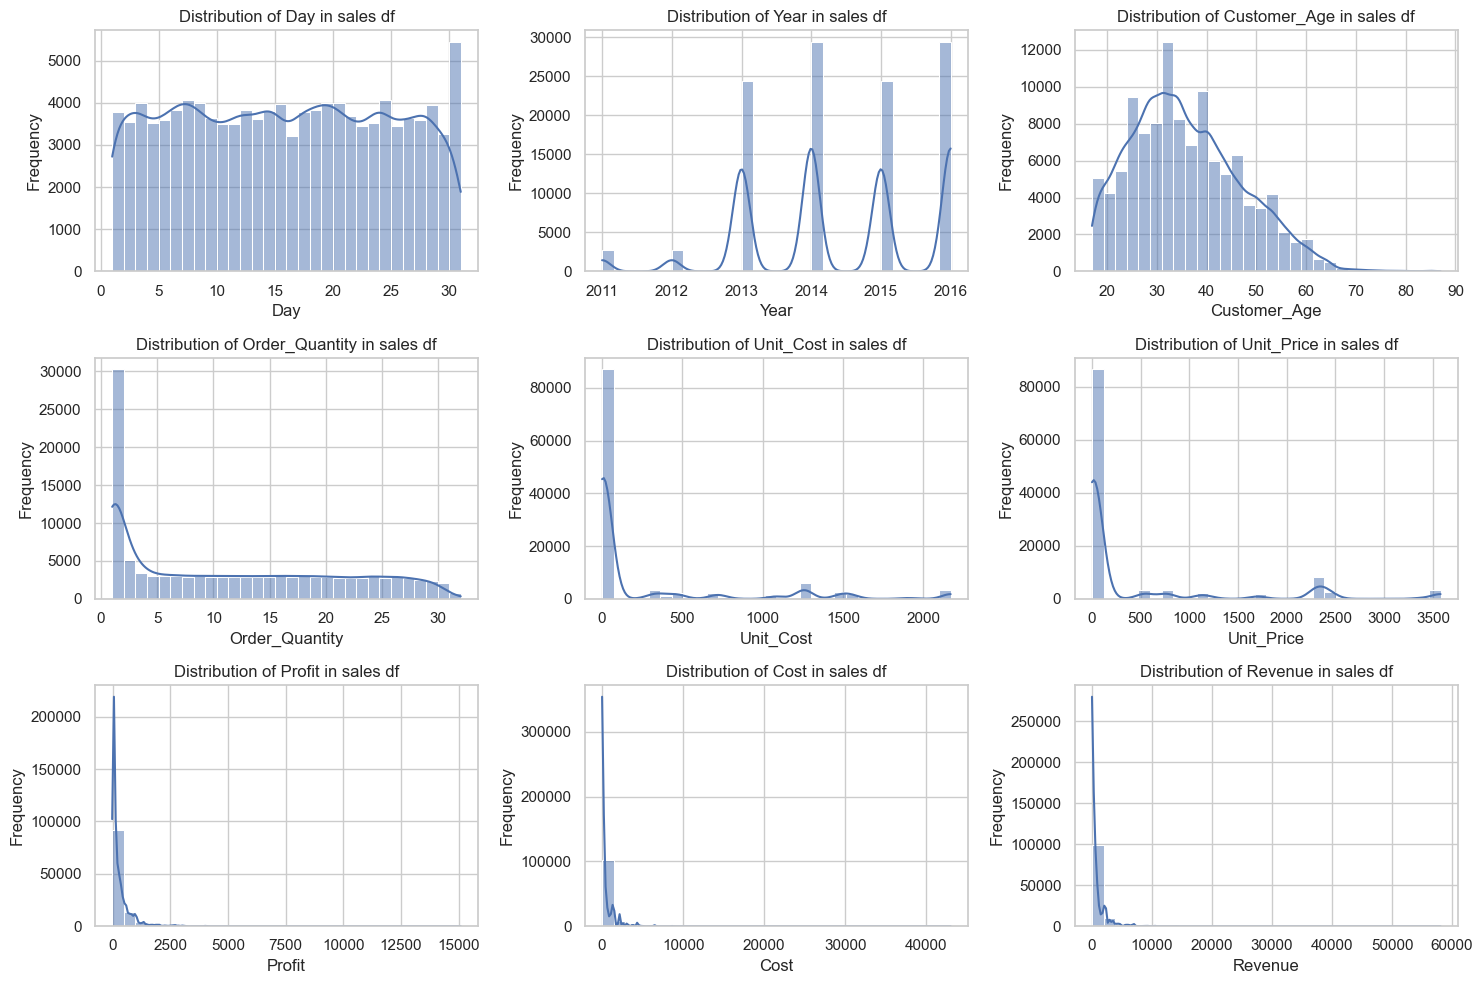

In [108]:
# Set the visual style
sns.set(style="whitegrid")

# Create a figure with subplots for each numeric column in your 'df'
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)  # Adjust the number of rows and columns as needed
    sns.histplot(sales_df[column], bins=30, kde=True)  # Use histplot for histogram and KDE
    plt.title(f'Distribution of {column} in sales df')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plots

In [109]:
# Apply log transformation to 'Day'
sales_df['Day'] = np.log(sales_df['Day'] + 1)  # Adding 1 to avoid log(0)

# Check the skewness again after transformation
skewness_after_transformation = sales_df['Day'].skew()
print("Skewness of 'Day' after log transformation:", skewness_after_transformation)

Skewness of 'Day' after log transformation: -0.9842141895125442


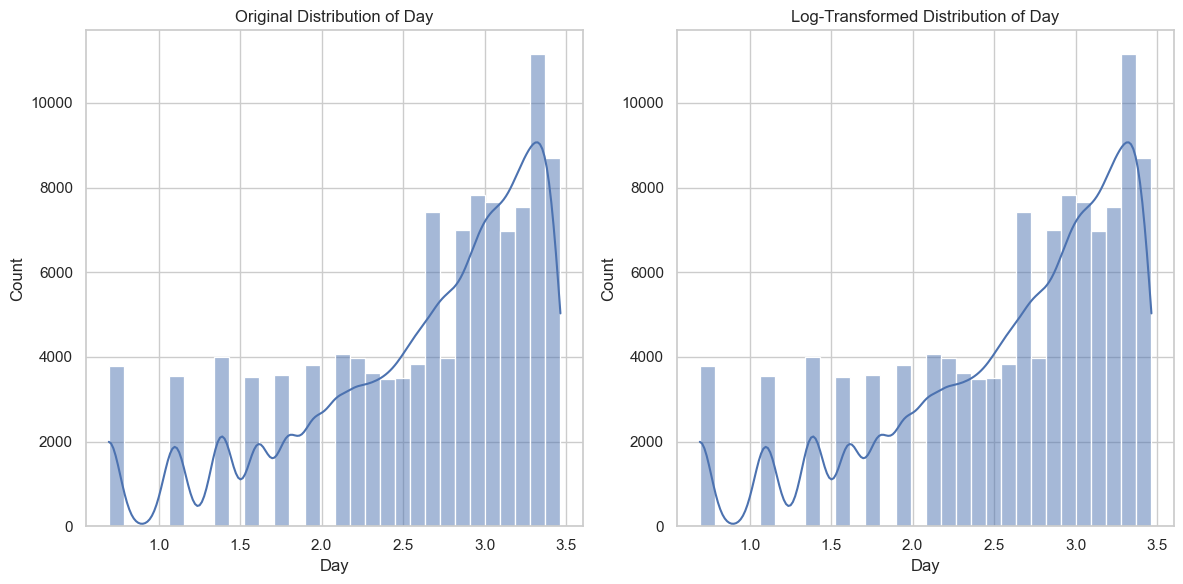

In [111]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(sales_df['Day'], bins=30, kde=True)
plt.title('Original Distribution of Day')

# Transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(sales_df['Day'], bins=30, kde=True)
plt.title('Log-Transformed Distribution of Day')

plt.tight_layout()
plt.show()

In [112]:
# To save my cleansed data
sales_df.to_csv('sales_cleaned.csv', index=False)

In [145]:
# Get all categorical columns
categorical_columns = sales_df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Date', 'Month', 'Age_Group', 'Customer_Gender', 'Country', 'State',
       'Product_Category', 'Sub_Category', 'Product'],
      dtype='object')


In [147]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['Date', 'Month', 'Age_Group', 'Customer_Gender', 
                    'Country', 'State', 'Product_Category', 
                    'Sub_Category', 'Product']

# Apply LabelEncoder to each categorical column in the original DataFrame
for col in categorical_cols:
    sales_df[col] = encoder.fit_transform(sales_df[col].astype(str))  # Convert to string to avoid NaN issues

# Check the DataFrame after encoding
print(sales_df.head())

   Date       Day  Month  Year  Customer_Age  Age_Group  Customer_Gender  \
0  1059  3.295837      9  2013            19          3                1   
1  1636  3.295837      9  2015            19          3                1   
2  1176  3.178054      7  2014            49          0                1   
3  1753  3.178054      7  2016            49          0                1   
4  1229  2.772589      8  2014            47          0                0   

   Country  State  Product_Category  Sub_Category  Product  Order_Quantity  \
0        1      5                 0             0       12               8   
1        1      5                 0             0       12               8   
2        0     26                 0             0       12              23   
3        0     26                 0             0       12              20   
4        0     26                 0             0       12               4   

   Unit_Cost  Unit_Price  Profit  Cost  Revenue  
0         45         120

In [149]:
sales_df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1059,3.295837,9,2013,19,3,1,1,5,0,0,12,8,45,120,590,360,950
1,1636,3.295837,9,2015,19,3,1,1,5,0,0,12,8,45,120,590,360,950
2,1176,3.178054,7,2014,49,0,1,0,26,0,0,12,23,45,120,1366,1035,2401
3,1753,3.178054,7,2016,49,0,1,0,26,0,0,12,20,45,120,1188,900,2088
4,1229,2.772589,8,2014,47,0,0,0,26,0,0,12,4,45,120,238,180,418


### Correlation

In [151]:
# Now, calculate the correlation matrix
correlation_matrix = sales_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                      Date       Day     Month      Year  Customer_Age  \
Date              1.000000  0.016185 -0.018509  0.973264      0.034482   
Day               0.016185  1.000000 -0.003108 -0.008056     -0.013411   
Month            -0.018509 -0.003108  1.000000 -0.071668     -0.004910   
Year              0.973264 -0.008056 -0.071668  1.000000      0.040994   
Customer_Age      0.034482 -0.013411 -0.004910  0.040994      1.000000   
Age_Group        -0.027550  0.013305  0.000168 -0.037181     -0.834252   
Customer_Gender   0.012796  0.013160 -0.002507  0.015592     -0.021954   
Country           0.029160  0.002458 -0.000619  0.022432      0.088634   
State            -0.019960  0.005290 -0.000828 -0.015390     -0.027047   
Product_Category -0.101531 -0.002164 -0.003098 -0.086202     -0.009001   
Sub_Category     -0.049652  0.008615  0.004270 -0.044808     -0.007976   
Product          -0.018190 -0.003998 -0.001367 -0.016550     -0.021209   
Order_Quantity    0.152910 -0.003430  

<Axes: >

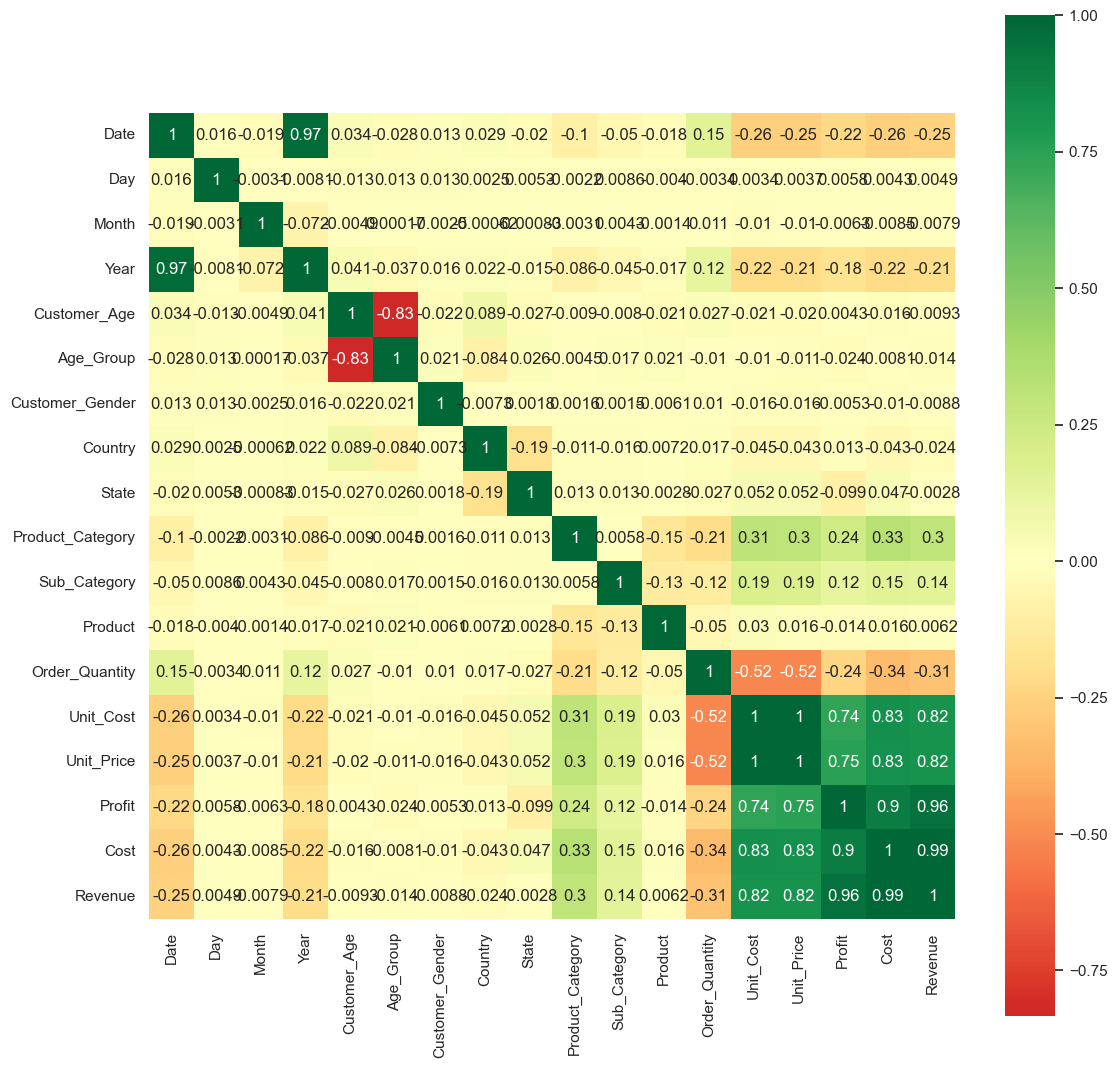

In [153]:
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(sales_df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

### Spliting

In [155]:
# Define your features (X) and target (y)
X = sales_df.drop('State', axis=1)  # All columns except the target
y = sales_df['State']  # Target column

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (90428, 17)
X_test shape: (22608, 17)
y_train shape: (90428,)
y_test shape: (22608,)


In [165]:
# Combine X_train and y_train into a single DataFrame for training set
train_df = pd.concat([X_train, y_train], axis=1)

# Combine X_test and y_test into a single DataFrame for testing set
test_df = pd.concat([X_test, y_test], axis=1)

# Export the training and testing sets to CSV files
train_df.to_csv('train_dataset.csv', index=False)  # Export training set
test_df.to_csv('test_dataset.csv', index=False)    # Export testing set

print("Training and Testing datasets have been exported successfully!")

Training and Testing datasets have been exported successfully!


#### Random Forest
##### Purpose: Random Forest is a more advanced and flexible model.
##### It works for binary, multi-class, and even regression problems.
##### How it works: It creates many decision trees on different subsets
##### of the data and averages their results to make a prediction.
##### Good for: Complex datasets with non-linear relationships.
##### It handles missing data and outliers well and generally has better
##### accuracy than simpler models.

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         9
           2       0.00      0.00      0.00         1
           3       0.89      0.86      0.87       276
           4       0.75      0.35      0.48        34
           5       0.99      1.00      1.00      2919
           6       0.98      1.00      0.99      4499
           7       0.62      0.30      0.40        27
           8       1.00      1.00      1.00      2745
           9       0.86      0.80      0.83       207
          10       0.00      0.00      0.00         7
          11       0.86      0.61      0.71        41
          12       0.00      0.00      0.00         1
          13       0.75      0.76      0.75       343
          14       0.84      0.84      0.84       210
          15       0.78      0.83      0.81       472
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00 

C:\Users\afola\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\afola\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\afola\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Make a short note on overfitting or under fittin and solve it if your dataset as either under fittin or overfitting

#### Overfitting:

##### Example: Imagine a student who studies for a test by memorizing every question and answer from past exams. On the day of the test, the student performs exceptionally well on the memorized questions (training data) but struggles with new questions that are not in the past exams (test data).
##### In ML Context: In a machine learning model trained to predict house prices based on various features (like size, location, and amenities), overfitting may occur if the model learns the specific prices of houses in the training dataset too closely. As a result, it may fail to predict the prices of new houses accurately because it cannot generalize beyond the learned specifics.

#### Underfitting:

##### Example: Consider a student who studies only the main topics of a subject without delving into the details or understanding the concepts. When faced with questions that require critical thinking or application of concepts, the student performs poorly, as they lack a deep understanding.
##### In ML Context: If you create a linear regression model to predict the sale price of a car based solely on its age without considering other important factors like mileage, brand, and condition, the model may be too simple to capture the complexities of car pricing. As a result, it underfits the data, leading to inaccurate predictions on both the training and test datasets.
#### Summary of Real-Life Implications
##### Overfitting results in a model that is too tailored to specific training data, causing it to miss out on general patterns and perform poorly in real-world scenarios.
##### Underfitting leads to a model that fails to capture important trends, resulting in consistently inaccurate predictions.
#### Visual Representation
##### Overfitting: A complex curve that fits the training data points closely but oscillates wildly, failing to predict new data accurately.
##### Underfitting: A straight line that does not follow the data trends, unable to capture the relationship between input and output.

### Solving for overfitting

In [170]:
random_forest_classifier = RandomForestClassifier(max_depth=5, random_state=42)

In [172]:
from sklearn.model_selection import cross_val_score
rf_cross_val = cross_val_score(random_forest_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores: ", rf_cross_val)
print("Average Cross-Validation Score: ", rf_cross_val.mean())

C:\Users\afola\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores:  [0.50016587 0.50060821 0.49972354 0.50389826 0.48907935]
Average Cross-Validation Score:  0.49869504564420825


#### Machine Learning Evaluation Metrics:
##### Chosen Evaluation Metric: F1-Score

##### The F1-score is a good choice for imbalanced datasets or when we care equally about precision and recall. 
##### Since i am having different classes in my dataset might not be evenly distributed, focusing on precision.

##### Precision tells us how many of the predicted positive cases were actually positive.

In [180]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

F1 Score: 0.9303064473505674
